In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('/Users/satrajitmaitra/Downloads/Hands/Hand_0011744.jpg')

In [3]:
img.shape

(1200, 1600, 3)

In [4]:
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
gray.shape

(1200, 1600)

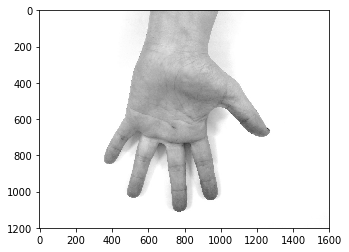

In [7]:
plt.imshow(gray, cmap='gray', vmin = 0, vmax = 255)

In [124]:
gray.shape

(1200, 1600)

In [125]:
blocks = np.array([gray[x:x+100,y:y+100] for x in range(0,gray.shape[0],100) for y in range(0,gray.shape[1],100)])

In [126]:
radius = 50
n_points = 8 * radius
lbps = np.array([local_binary_pattern(block, n_points, radius, 'default').reshape(10000,) for block in blocks])

In [127]:
lbps.shape

(192, 10000)

In [128]:
lbp_histograms = np.array([np.histogram(lbp, bins=np.arange(257), density=True)[0] for lbp in lbps])
lbp_histograms.shape

(192, 256)

In [129]:
# concat_histograms = np.vstack(np.array(lbp_histograms))
concat_histograms = lbp_histograms[0]
for i in range(1, len(lbp_histograms)):
    concat_histograms = np.concatenate([concat_histograms, lbp_histograms[i]])
concat_histograms

array([0.92909238, 0.01012966, 0.        , ..., 0.        , 0.        ,
       0.00668948])

In [130]:
concat_histograms.shape

(49152,)

In [116]:
lbp_dict = {
    "Hand_0011744": concat_histograms
}
import json
# json.dumps(lbp_dict)
with open('/Users/satrajitmaitra/HandImages/lbp_dict.json', 'w') as fp:
    json.dump(lbp_dict, fp, indent=4, sort_keys=True)

In [287]:
lbp = local_binary_pattern(gray, n_points, radius, 'default')

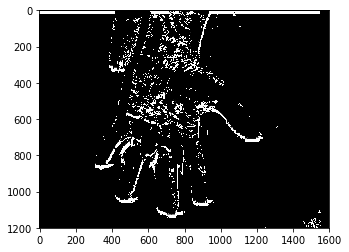

In [288]:
plt.imshow(lbp, cmap='gray', vmin = 0, vmax = 255)

In [289]:
lbp

array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 3.,  3.,  3., ...,  0.,  0.,  0.],
       [ 7.,  7.,  7., ...,  0.,  0.,  0.],
       ...,
       [-1., -1., -1., ...,  0.,  0.,  0.],
       [-1., -1., -1., ...,  0.,  0.,  0.],
       [-1., -1., -1., ...,  0.,  0.,  0.]])

In [78]:
np.arange(256).shape

(256,)